# User experience - Gabbar

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('ticks')

In [3]:
pd.set_option('display.precision', 2)
pd.set_option('display.max_columns', None)

## Reverting changesets

In [4]:
reverting_path = '../downloads/reverting/'

In [5]:
revertings = pd.read_csv(reverting_path + 'attributes.csv')
print(revertings.shape)
revertings.head()

(2575, 5)


,changeset_id,user_name,user_changesets,user_features,user_mapping_days
0,44820611,zors1843,10444,440026,2074
1,44820637,zors1843,10444,440026,2074
2,44820658,zors1843,10444,440026,2074
3,44820682,zors1843,10444,440026,2074
4,44820823,zors1843,10444,440026,2074


In [6]:
# Drop all duplicate attributes.
print('Shape before dropping duplicates: {}'.format(revertings.shape))
revertings = revertings.drop_duplicates(subset='changeset_id')
print('Shape after dropping duplicates: {}'.format(revertings.shape))

Shape before dropping duplicates: (2575, 5)
Shape after dropping duplicates: (2575, 5)


In [7]:
reverting_by_user = revertings.groupby('user_name')['changeset_id'].count()
print('Users with one or more reverting changesets: {}'.format(reverting_by_user.size))

Users with one or more reverting changesets: 468


In [8]:
revertings[revertings['user_changesets'] > 100].shape

(2493, 5)

In [9]:
print(revertings[revertings['user_changesets'] < 20].shape)
revertings[revertings['user_changesets'] < 20].to_csv(reverting_path + 'new-users-reverting.csv', index=False)

(21, 5)


In [10]:
def get_reverting_count(user):
    return reverting_by_user[user]

In [11]:
revertings['reverting_changesets'] = revertings['user_name'].apply(get_reverting_count)
revertings = revertings.sort_values(by='reverting_changesets', ascending=False)
revertings.drop_duplicates(subset='user_name').head()

,changeset_id,user_name,user_changesets,user_features,user_mapping_days,reverting_changesets
517,46940125,eggie,30464,1053389,2085,278
931,47754606,iWowik,6307,1714382,1276,97
1034,47779588,chillly,8985,1048251,1827,64
78,46132274,SomeoneElse_Revert,1853,1525970,377,52
1217,48275284,Eric S,6185,1309439,1385,50


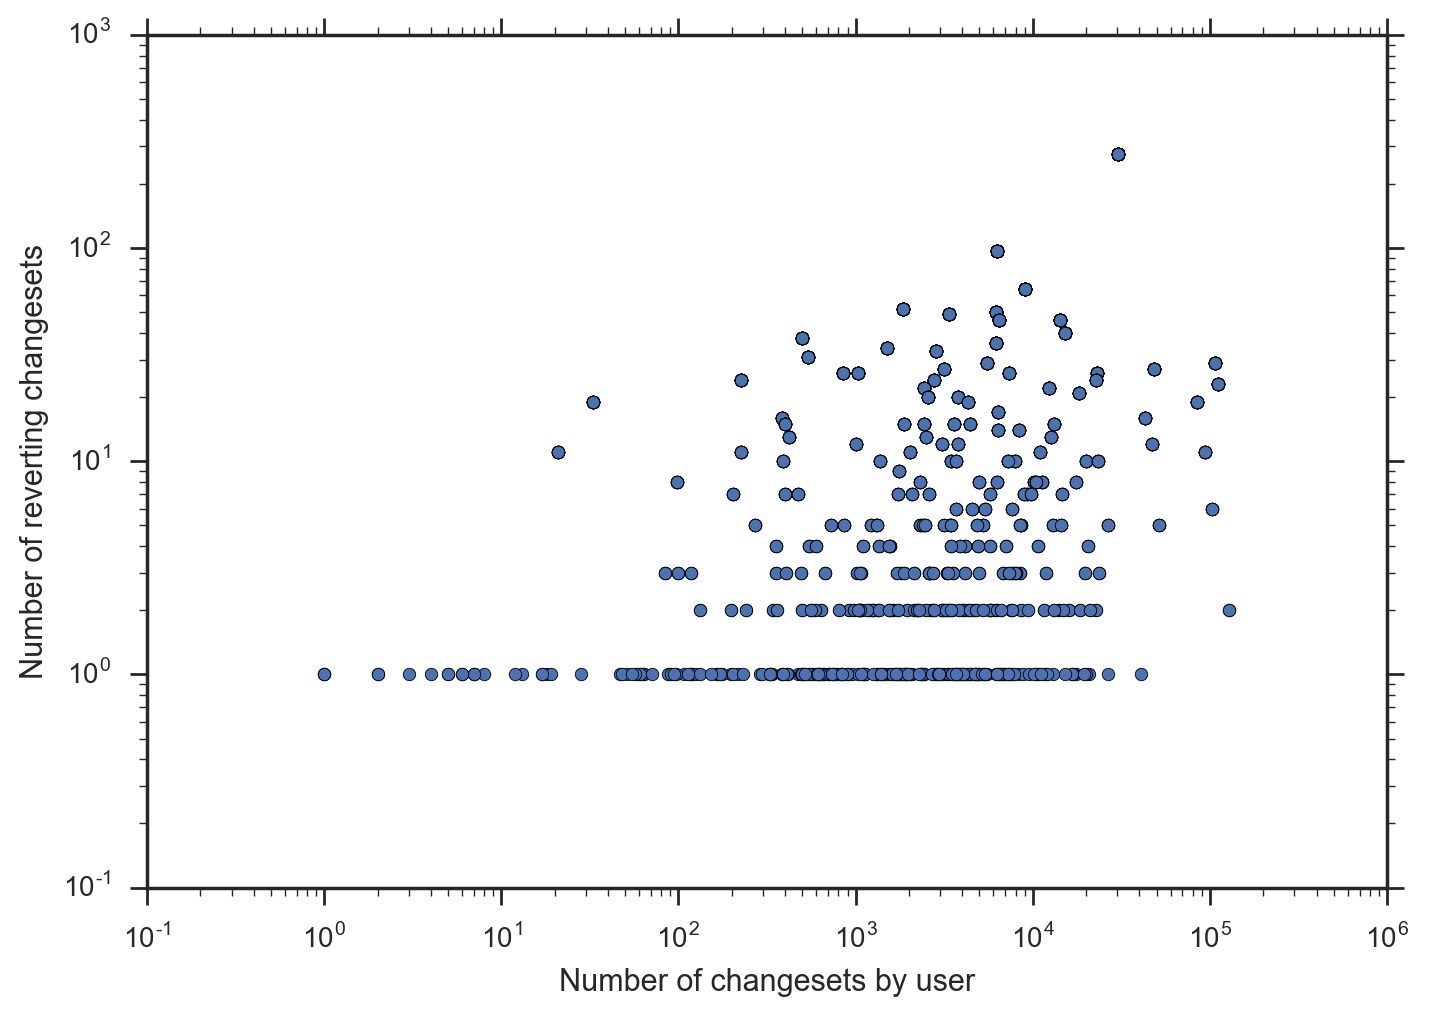

In [12]:
ax = revertings.plot.scatter(x='user_changesets', y='reverting_changesets')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Number of changesets by user')
ax.set_ylabel('Number of reverting changesets')

In [13]:
reverting_corr = revertings.corr()
reverting_corr

,changeset_id,user_changesets,user_features,user_mapping_days,reverting_changesets
changeset_id,1.00,0.02,1.32e-02,-0.05,-1.07e-01
user_changesets,0.02,1.00,6.24e-02,0.35,3.00e-01
user_features,0.01,0.06,1.00e+00,0.09,-1.33e-04
user_mapping_days,-0.05,0.35,8.64e-02,1.00,6.03e-01
reverting_changesets,-0.11,0.30,-1.33e-04,0.60,1.00e+00


In [14]:
reverting_mask = np.zeros_like(reverting_corr, dtype=np.bool)
reverting_mask[np.triu_indices_from(reverting_mask)] = True

In [15]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

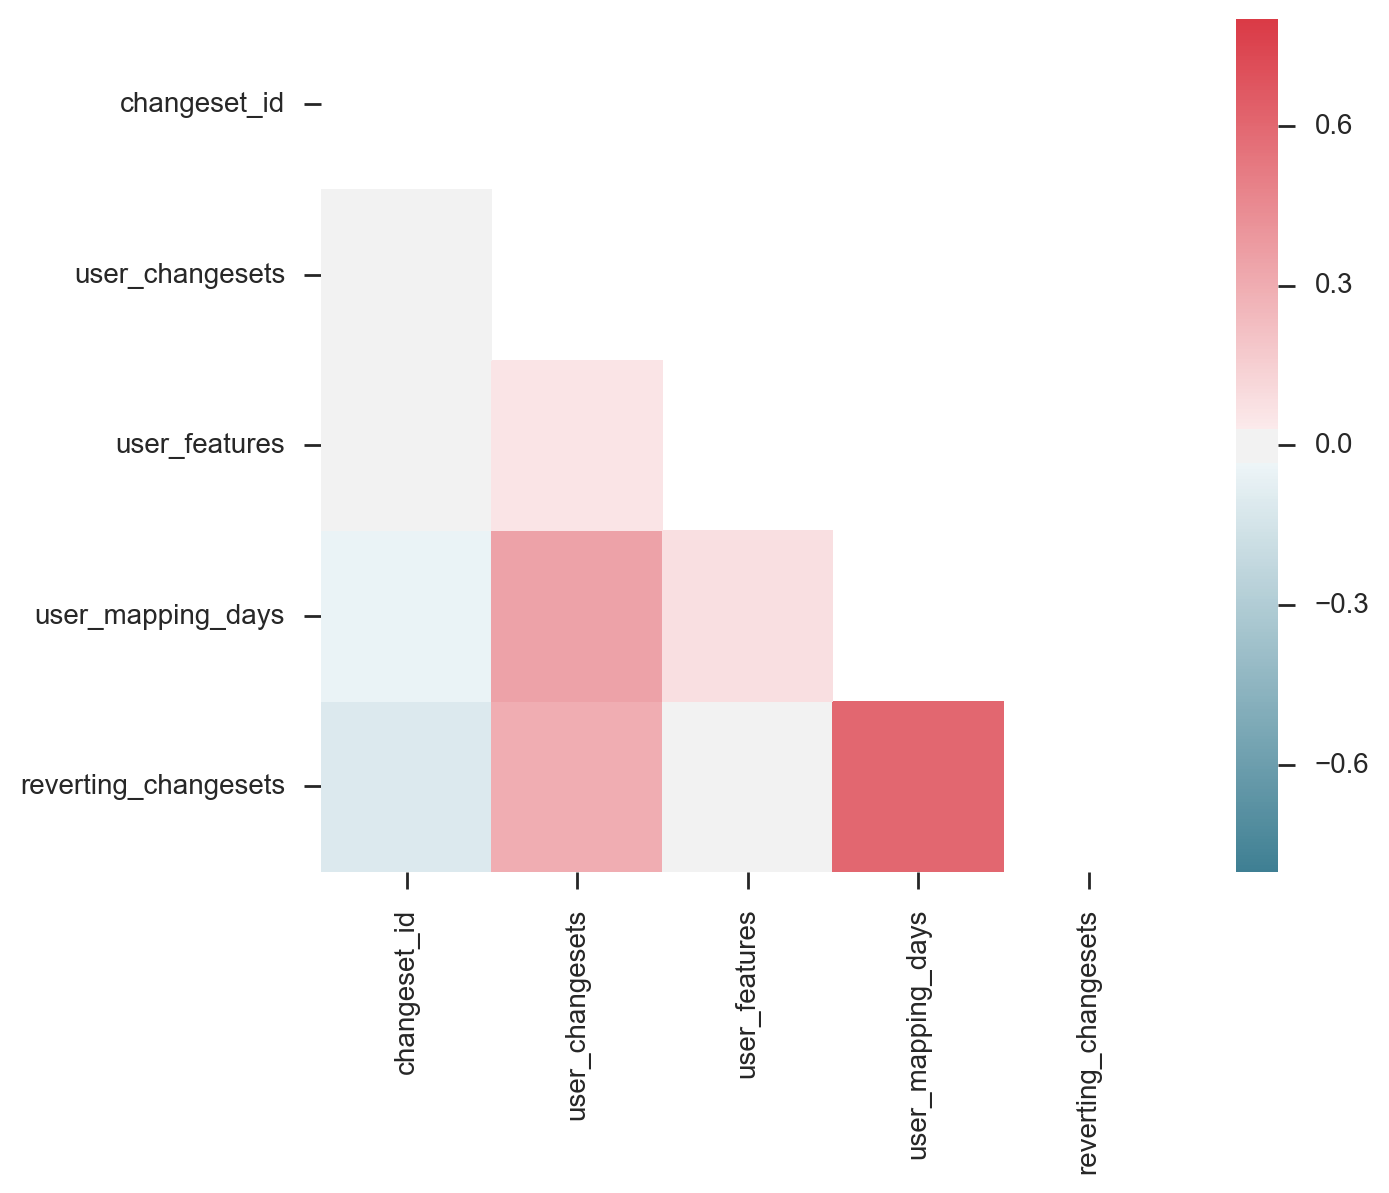

In [16]:
sns.heatmap(reverting_corr, vmax=.8, mask=reverting_mask, cmap=cmap, square=True);

## Reverted changesets

In [17]:
reverted_path = '../downloads/reverted/'

In [18]:
reverteds = pd.read_csv(reverted_path + 'attributes.csv')
print(reverteds.shape)
reverteds.head()

(10612, 5)


,changeset_id,user_name,user_changesets,user_features,user_mapping_days
0,44820611,zors1843,10444,440026,2074
1,44820637,zors1843,10444,440026,2074
2,44821682,yelowblood,1783,61635,82
3,44823416,Gppes,1449,181678,301
4,44823808,MaBo26,1,623,1


In [19]:
# Drop all duplicate attributes.
print('Shape before dropping duplicates: {}'.format(reverteds.shape))
reverteds = reverteds.drop_duplicates(subset='changeset_id')
print('Shape after dropping duplicates: {}'.format(reverteds.shape))

Shape before dropping duplicates: (10612, 5)
Shape after dropping duplicates: (10612, 5)


In [20]:
reverted_by_user = reverteds.groupby('user_name')['changeset_id'].count()
print('Users with one or more reverted changesets: {}'.format(reverted_by_user.size))

Users with one or more reverted changesets: 1301


In [21]:
reverteds[reverteds['user_changesets'] > 100].shape

(8679, 5)

In [22]:
print(reverteds[reverteds['user_changesets'] < 20].shape)
reverteds[reverteds['user_changesets'] < 20].to_csv(reverted_path + 'new-users-reverted.csv', index=False)

(1161, 5)


In [23]:
def get_reverted_count(user):
    return reverted_by_user[user]

In [24]:
reverteds['reverted_changesets'] = reverteds['user_name'].apply(get_reverted_count)
reverteds = reverteds.sort_values(by='reverted_changesets', ascending=False)
reverteds.drop_duplicates(subset='user_name').head()

,changeset_id,user_name,user_changesets,user_features,user_mapping_days,reverted_changesets
9415,49477306,DACGroup,6731,6686,10,4106
2280,47488916,ti-lo,1814,1982,166,1997
1832,47469362,Зелёный Кошак,10542,125359,228,708
4351,47814143,wbmstr,388,14412,47,282
4616,48208877,HourOfTheWulf,1310,11619,76,167


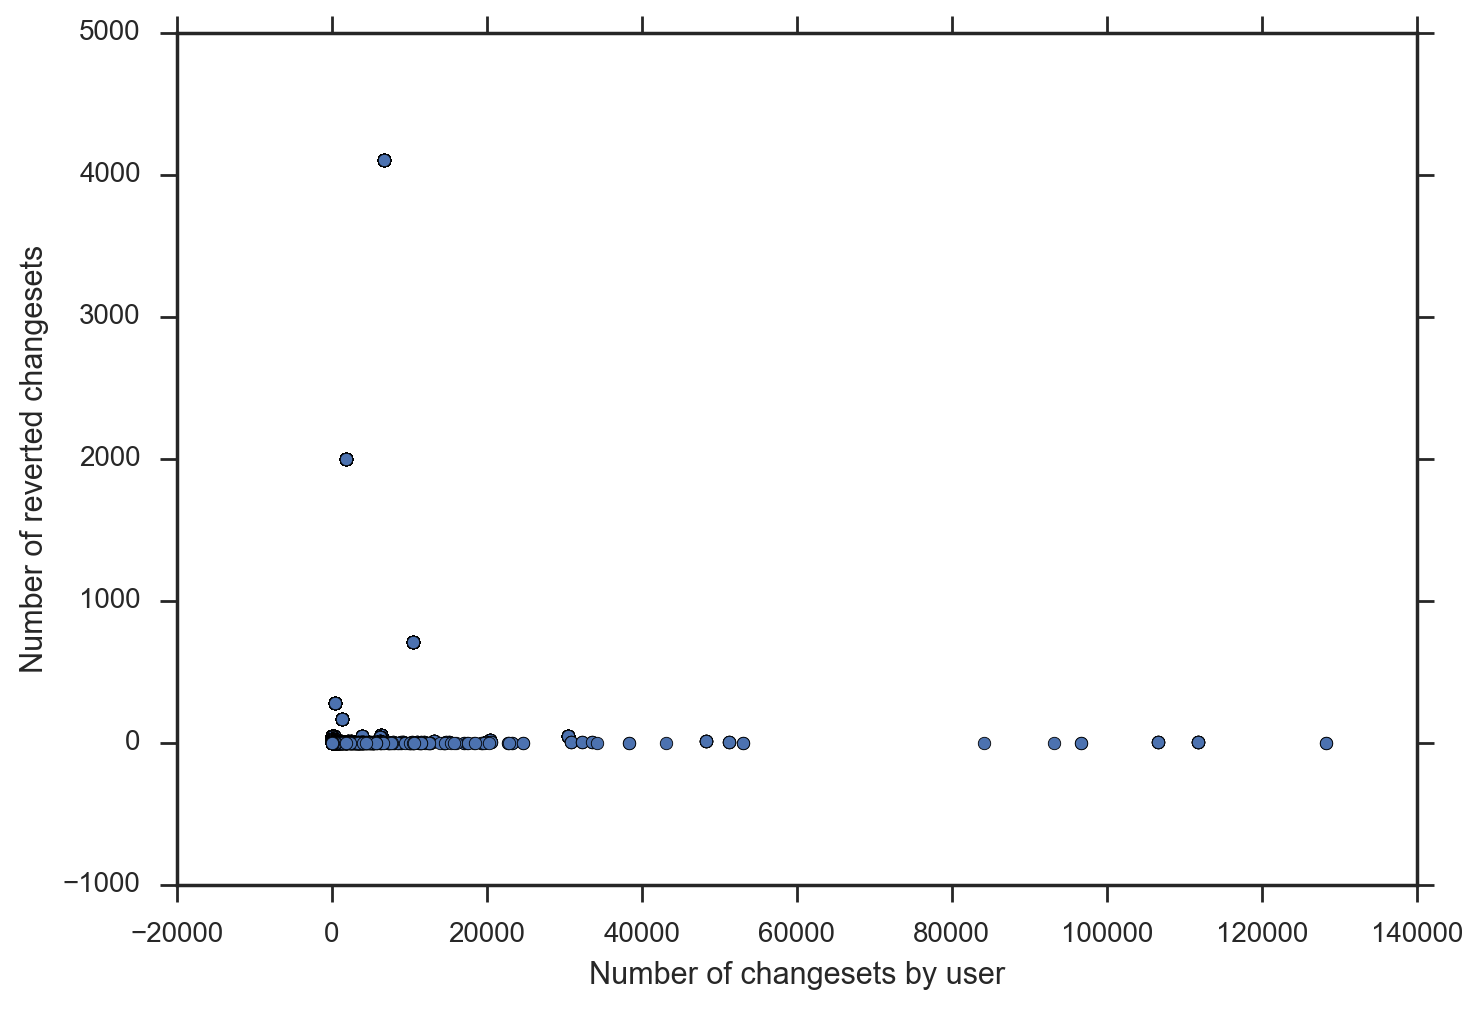

In [25]:
ax = reverteds.plot.scatter(x='user_changesets', y='reverted_changesets')

# ax.set_xscale('log')
# ax.set_yscale('log')

ax.set_xlabel('Number of changesets by user')
ax.set_ylabel('Number of reverted changesets')

In [26]:
reverteds.sort_values(by='user_changesets', ascending=False).head()

,changeset_id,user_name,user_changesets,user_features,user_mapping_days,reverted_changesets
8322,49287802,RichRico,128320,3476246,688,2
3146,47545671,RichRico,128320,3476246,688,2
4953,48376843,calfarome,111773,2216157,569,9
4952,48376177,calfarome,111773,2216157,569,9
3475,47625931,calfarome,111773,2216157,569,9


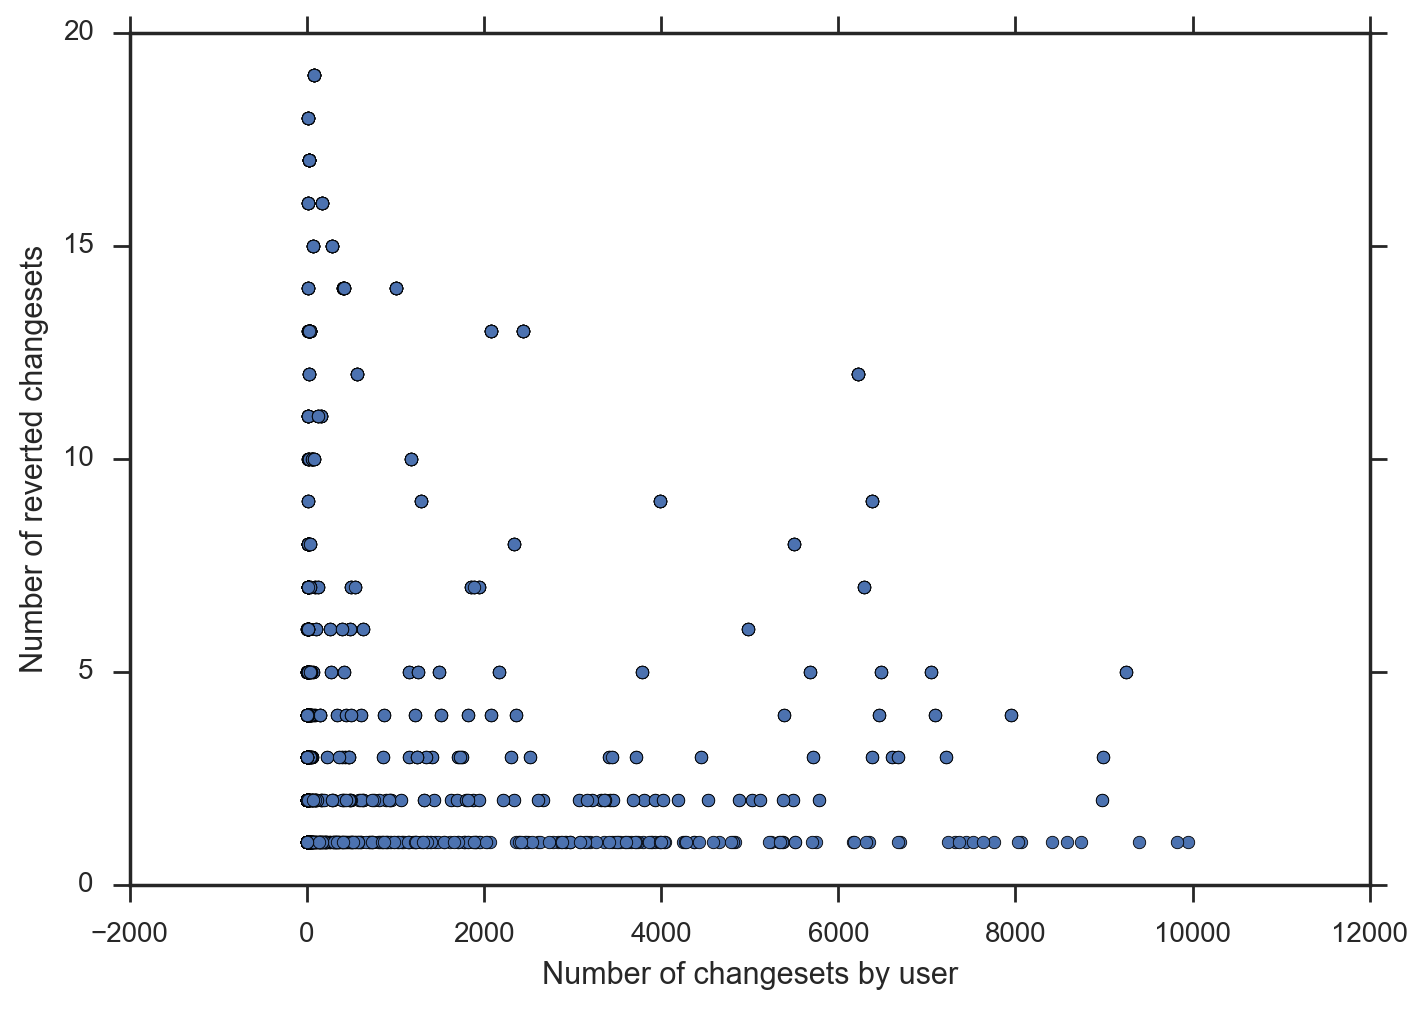

In [27]:
# Removing the outliers.
ax = reverteds[
    (reverteds['reverted_changesets'] < 20) &
    (reverteds['user_changesets'] < 10000)
].plot.scatter(x='user_changesets', y='reverted_changesets')

# ax.set_xscale('log')
# ax.set_yscale('log')

ax.set_xlabel('Number of changesets by user')
ax.set_ylabel('Number of reverted changesets')

In [28]:
reverted_corr = reverteds.corr()
reverted_corr

,changeset_id,user_changesets,user_features,user_mapping_days,reverted_changesets
changeset_id,1.00,0.23,0.05,-0.19,0.64
user_changesets,0.23,1.00,0.19,0.35,0.21
user_features,0.05,0.19,1.00,0.31,-0.10
user_mapping_days,-0.19,0.35,0.31,1.00,-0.33
reverted_changesets,0.64,0.21,-0.10,-0.33,1.00


In [29]:
reverted_mask = np.zeros_like(reverted_corr, dtype=np.bool)
reverted_mask[np.triu_indices_from(reverted_mask)] = True

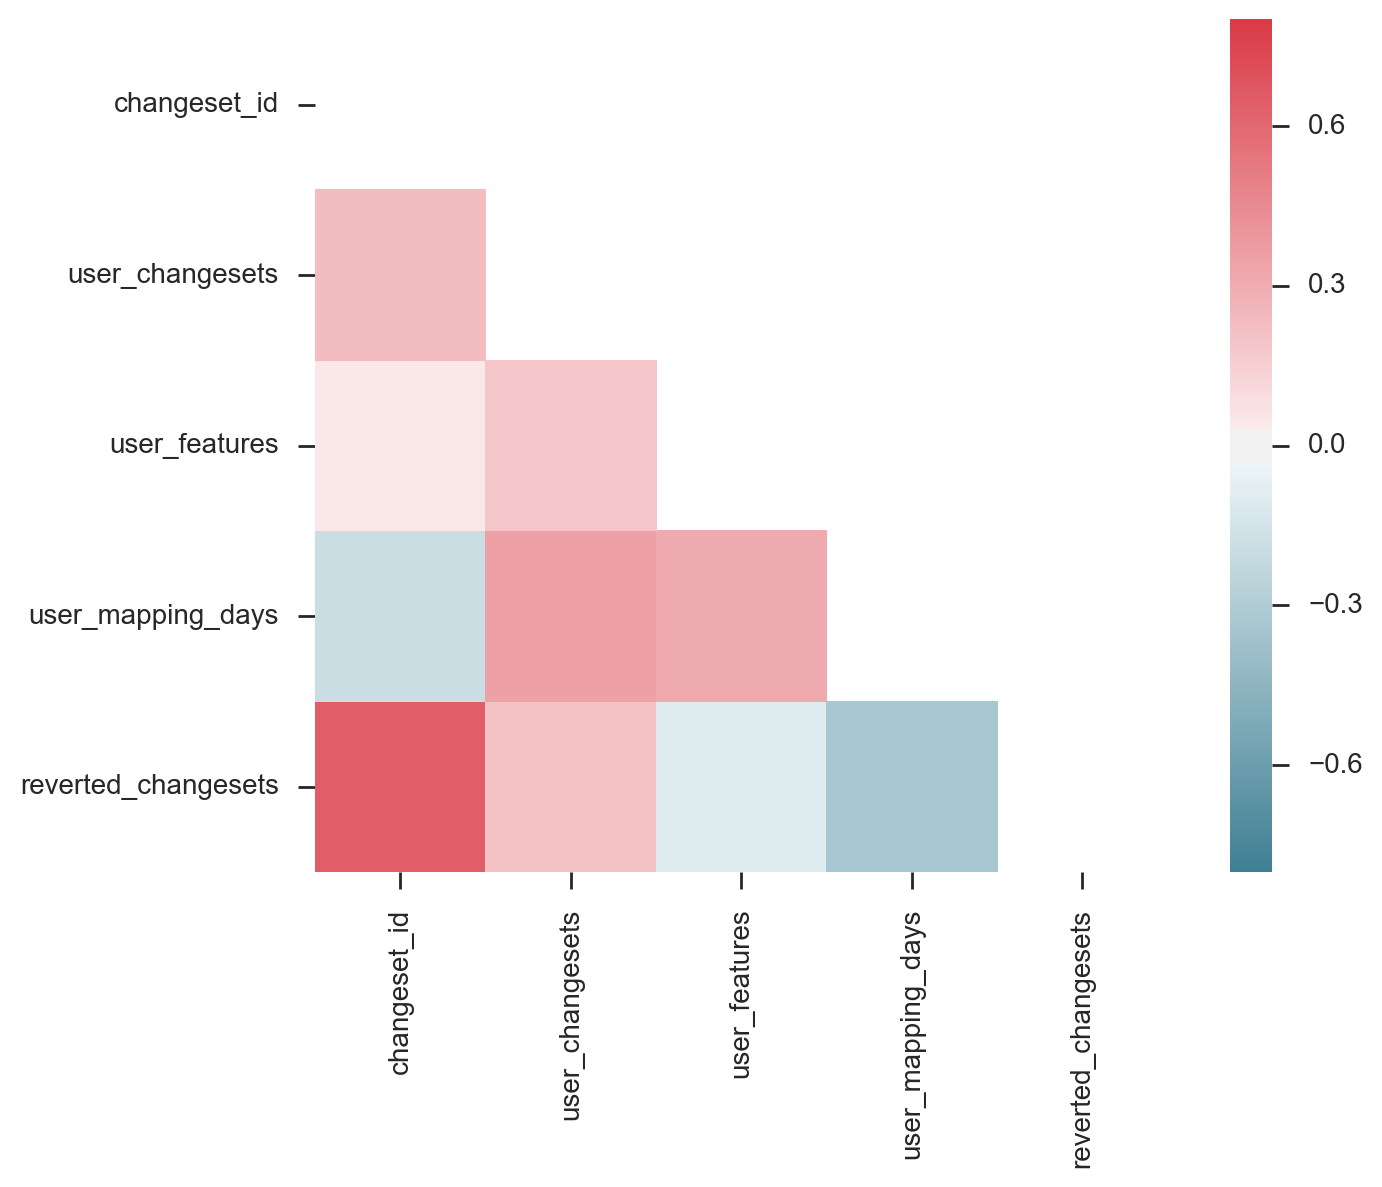

In [30]:
sns.heatmap(reverted_corr, vmax=.8, mask=reverted_mask, cmap=cmap, square=True);